In [1]:
import re
import pandas as pd

In [2]:
file_path = "WhatsApp Chat with CampusX (unofficial).txt"

with open(file_path, "r", encoding="utf-8") as file:
        chat_text = file.read()


In [3]:
chat_text

'6/26/24, 9:09\u202fPM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n4/9/24, 1:23\u202fPM - ~\u202fSundram created group "CampusX (unofficial)"\n6/26/24, 9:09\u202fPM - Omegale🎃 added you\n6/26/24, 9:15\u202fPM - +91 63058 62135: Most companies don\'t ask for DSA but quite a few companies ask questions related to DSA.\n6/26/24, 9:16\u202fPM - +91 90360 12909: Yeah, that\'s a problem...a lot of things are expected from Data scientists..\n6/26/24, 9:16\u202fPM - +91 90360 12909: There should be an easy way to handle this DSA\n6/26/24, 9:17\u202fPM - +91 95605 07334: Doesn’t develoving complex algorithms enough for companies to judge our problem solving skills😑\n6/26/24, 9:21\u202fPM - +91 63058 62135: Yes, the increase in competition did increase the requirements. Can\'t predict the trend in the near future.\n6/26/24, 11:13\u202fPM - +91 60060 58125: https://www.netpyconcepts.in/\n6/27/24, 8:

In [4]:
pattern = r"(\d{1,2}/\d{1,2}/\d{2,4}),\s*(\d{1,2}:\d{2}\s*[APap][Mm])\s*-\s*([^:]+):\s*(.*)"

In [5]:
chat_text = chat_text.replace("\u202f", " ")  # Replace non-breaking space with regular space
# THis line of code is imp otherwise it will give empty dataset

In [6]:
matches = re.findall(pattern, chat_text)

In [7]:
date = re.findall(pattern,chat_text)

In [8]:
date

[('6/26/24',
  '9:09 PM',
  'Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n4/9/24, 1',
  '23 PM - ~ Sundram created group "CampusX (unofficial)"'),
 ('6/26/24',
  '9:09 PM',
  'Omegale🎃 added you\n6/26/24, 9',
  "15 PM - +91 63058 62135: Most companies don't ask for DSA but quite a few companies ask questions related to DSA."),
 ('6/26/24',
  '9:16 PM',
  '+91 90360 12909',
  "Yeah, that's a problem...a lot of things are expected from Data scientists.."),
 ('6/26/24',
  '9:16 PM',
  '+91 90360 12909',
  'There should be an easy way to handle this DSA'),
 ('6/26/24',
  '9:17 PM',
  '+91 95605 07334',
  'Doesn’t develoving complex algorithms enough for companies to judge our problem solving skills😑'),
 ('6/26/24',
  '9:21 PM',
  '+91 63058 62135',
  "Yes, the increase in competition did increase the requirements. Can't predict the trend in the near future."),
 ('6/26/24', '11:13 PM', '+91 60060

In [9]:
df = pd.DataFrame(matches, columns=["date", "time", "sender", "message"])

In [10]:
df.to_csv("whatsapp_chat.csv", index=False)

In [11]:
df.shape

(6352, 4)

In [12]:
df["date"] = pd.to_datetime(df["date"], format="%m/%d/%y", errors="coerce")  # Adjust format if needed

In [13]:
df["datetime"] = df["date"].dt.strftime("%Y-%m-%d") + " " + df["time"]
df["datetime"] = pd.to_datetime(df["datetime"], format="%Y-%m-%d %I:%M %p", errors="coerce")
df['datetime'] = df['datetime'].dt.strftime("%Y-%m-%d %I:%M %p")

In [14]:
df

,date,time,sender,message,datetime
0,2024-06-26,9:09 PM,Messages and calls are end-to-end encrypted. N...,"23 PM - ~ Sundram created group ""CampusX (unof...",2024-06-26 09:09 PM
1,2024-06-26,9:09 PM,"Omegale🎃 added you\n6/26/24, 9",15 PM - +91 63058 62135: Most companies don't ...,2024-06-26 09:09 PM
2,2024-06-26,9:16 PM,+91 90360 12909,"Yeah, that's a problem...a lot of things are e...",2024-06-26 09:16 PM
3,2024-06-26,9:16 PM,+91 90360 12909,There should be an easy way to handle this DSA,2024-06-26 09:16 PM
4,2024-06-26,9:17 PM,+91 95605 07334,Doesn’t develoving complex algorithms enough f...,2024-06-26 09:17 PM
...,...,...,...,...,...
6347,2025-02-02,9:33 AM,+91 75594 09854,<Media omitted>,2025-02-02 09:33 AM
6348,2025-02-02,2:35 PM,+91 83055 24734,mee,2025-02-02 02:35 PM
6349,2025-02-02,9:49 PM,+91 73511 15354,<Media omitted>,2025-02-02 09:49 PM
6350,2025-02-03,11:52 AM,+92 321 4229408,Have Nitish sir done any mini project on Linea...,2025-02-03 11:52 AM


In [15]:
df = df.drop(columns =['date','time'])

In [16]:
df.head()

,sender,message,datetime
0,Messages and calls are end-to-end encrypted. N...,"23 PM - ~ Sundram created group ""CampusX (unof...",2024-06-26 09:09 PM
1,"Omegale🎃 added you\n6/26/24, 9",15 PM - +91 63058 62135: Most companies don't ...,2024-06-26 09:09 PM
2,+91 90360 12909,"Yeah, that's a problem...a lot of things are e...",2024-06-26 09:16 PM
3,+91 90360 12909,There should be an easy way to handle this DSA,2024-06-26 09:16 PM
4,+91 95605 07334,Doesn’t develoving complex algorithms enough f...,2024-06-26 09:17 PM


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6352 entries, 0 to 6351
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    6352 non-null   object
 1   message   6352 non-null   object
 2   datetime  6352 non-null   object
dtypes: object(3)
memory usage: 149.0+ KB


In [18]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13308\3976731629.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6352 entries, 0 to 6351
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   sender    6352 non-null   object        
 1   message   6352 non-null   object        
 2   datetime  6352 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 149.0+ KB


In [20]:
df['year'] = df['datetime'].dt.year

In [21]:
df.head()

,sender,message,datetime,year
0,Messages and calls are end-to-end encrypted. N...,"23 PM - ~ Sundram created group ""CampusX (unof...",2024-06-26 21:09:00,2024
1,"Omegale🎃 added you\n6/26/24, 9",15 PM - +91 63058 62135: Most companies don't ...,2024-06-26 21:09:00,2024
2,+91 90360 12909,"Yeah, that's a problem...a lot of things are e...",2024-06-26 21:16:00,2024
3,+91 90360 12909,There should be an easy way to handle this DSA,2024-06-26 21:16:00,2024
4,+91 95605 07334,Doesn’t develoving complex algorithms enough f...,2024-06-26 21:17:00,2024


In [22]:
df['month'] = df['datetime'].dt.month_name()

In [23]:
df['day'] = df['datetime'].dt.day

In [24]:
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute

In [25]:
df.head()

,sender,message,datetime,year,month,day,hour,minute
0,Messages and calls are end-to-end encrypted. N...,"23 PM - ~ Sundram created group ""CampusX (unof...",2024-06-26 21:09:00,2024,June,26,21,9
1,"Omegale🎃 added you\n6/26/24, 9",15 PM - +91 63058 62135: Most companies don't ...,2024-06-26 21:09:00,2024,June,26,21,9
2,+91 90360 12909,"Yeah, that's a problem...a lot of things are e...",2024-06-26 21:16:00,2024,June,26,21,16
3,+91 90360 12909,There should be an easy way to handle this DSA,2024-06-26 21:16:00,2024,June,26,21,16
4,+91 95605 07334,Doesn’t develoving complex algorithms enough f...,2024-06-26 21:17:00,2024,June,26,21,17


In [26]:
df = df[['datetime', 'sender', 'message','year','month','day','hour','minute']]


In [27]:
df.head()

,datetime,sender,message,year,month,day,hour,minute
0,2024-06-26 21:09:00,Messages and calls are end-to-end encrypted. N...,"23 PM - ~ Sundram created group ""CampusX (unof...",2024,June,26,21,9
1,2024-06-26 21:09:00,"Omegale🎃 added you\n6/26/24, 9",15 PM - +91 63058 62135: Most companies don't ...,2024,June,26,21,9
2,2024-06-26 21:16:00,+91 90360 12909,"Yeah, that's a problem...a lot of things are e...",2024,June,26,21,16
3,2024-06-26 21:16:00,+91 90360 12909,There should be an easy way to handle this DSA,2024,June,26,21,16
4,2024-06-26 21:17:00,+91 95605 07334,Doesn’t develoving complex algorithms enough f...,2024,June,26,21,17


In [28]:
df.to_csv('whatsapp_chat.csv')

In [29]:
for message in  df['message']:
    print(message)
    print("-"*50)

23 PM - ~ Sundram created group "CampusX (unofficial)"
--------------------------------------------------
15 PM - +91 63058 62135: Most companies don't ask for DSA but quite a few companies ask questions related to DSA.
--------------------------------------------------
Yeah, that's a problem...a lot of things are expected from Data scientists..
--------------------------------------------------
There should be an easy way to handle this DSA
--------------------------------------------------
Doesn’t develoving complex algorithms enough for companies to judge our problem solving skills😑
--------------------------------------------------
Yes, the increase in competition did increase the requirements. Can't predict the trend in the near future.
--------------------------------------------------
https://www.netpyconcepts.in/
--------------------------------------------------
19 AM - +91 84319 27643: https://www.linkedin.com/posts/rakshith-m-l-785447244_ai-mlops-llmops-activity-721190806624

In [30]:
words = []
for message in df['message']:
    words.extend(message.split())
    


In [31]:
len(words)

51364

In [32]:
round((df['sender'].value_counts()/df.shape[0])*100,2)[:20].reset_index()

,sender,count
0,+91 73511 15354,5.76
1,+91 95402 91360,5.75
2,+91 93502 21394,5.49
3,+91 82994 60484,4.27
4,+91 84319 27643,4.16
5,+91 99977 00487,2.91
6,+91 74209 25439,2.52
7,+91 63826 28726,2.33
8,+91 96549 13088,1.78
9,+91 79057 30487,1.72


In [33]:
df[df['message'] != '<Media omitted>']

,datetime,sender,message,year,month,day,hour,minute
0,2024-06-26 21:09:00,Messages and calls are end-to-end encrypted. N...,"23 PM - ~ Sundram created group ""CampusX (unof...",2024,June,26,21,9
1,2024-06-26 21:09:00,"Omegale🎃 added you\n6/26/24, 9",15 PM - +91 63058 62135: Most companies don't ...,2024,June,26,21,9
2,2024-06-26 21:16:00,+91 90360 12909,"Yeah, that's a problem...a lot of things are e...",2024,June,26,21,16
3,2024-06-26 21:16:00,+91 90360 12909,There should be an easy way to handle this DSA,2024,June,26,21,16
4,2024-06-26 21:17:00,+91 95605 07334,Doesn’t develoving complex algorithms enough f...,2024,June,26,21,17
...,...,...,...,...,...,...,...,...
6343,2025-02-01 17:28:00,+91 98707 69709,This message was deleted,2025,February,1,17,28
6344,2025-02-02 02:36:00,+90 541 553 96 39 changed their phone number t...,51 AM - +91 73511 15354: Kiski kay pass nitish...,2025,February,2,2,36
6348,2025-02-02 14:35:00,+91 83055 24734,mee,2025,February,2,14,35
6350,2025-02-03 11:52:00,+92 321 4229408,Have Nitish sir done any mini project on Linea...,2025,February,3,11,52


In [34]:
temp = df[df['message'] != '<Media omitted>']

In [35]:
temp[temp['message'] == '<Media omitted>']

,datetime,sender,message,year,month,day,hour,minute


In [36]:
f = open('stop_hinglish.txt','r')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [37]:
words  = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [38]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,message,353
1,data,307
2,+91,236
3,pm,201
4,deleted,185
5,learning,160
6,<this,159
7,edited>,159
8,course,156
9,ml,148


In [39]:
import emoji

In [40]:
! pip install emoji

In [41]:
import emoji

In [42]:
emojis = []

# Loop through each message and extract emojis
for message in df['message']:
    emojis.extend([c for c in message if emoji.is_emoji(c)])



In [93]:
emoji_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

<BarContainer object of 5 artists>

C:\Users\Administrator\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  func(*args, **kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  func(*args, **kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  func(*args, **kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\anaconda3\Lib\site-packages\IPython\core\

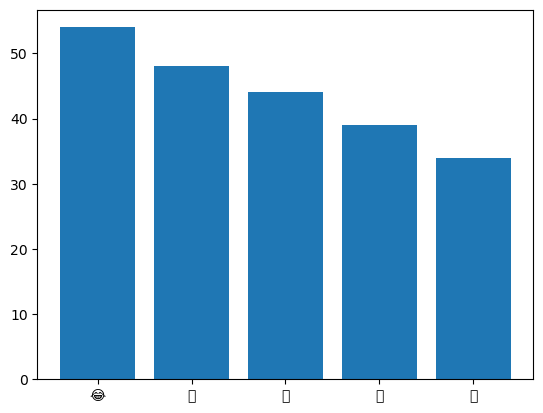

In [101]:
import matplotlib.pyplot as plt
plt.bar(emoji_df[0].head(),emoji_df[1].head())

In [105]:
df['month_num'] = df['datetime'].dt.month

In [109]:
df.head()

,datetime,sender,message,year,month,day,hour,minute,month_num
0,2024-06-26 21:09:00,Messages and calls are end-to-end encrypted. N...,"23 PM - ~ Sundram created group ""CampusX (unof...",2024,June,26,21,9,6
1,2024-06-26 21:09:00,"Omegale🎃 added you\n6/26/24, 9",15 PM - +91 63058 62135: Most companies don't ...,2024,June,26,21,9,6
2,2024-06-26 21:16:00,+91 90360 12909,"Yeah, that's a problem...a lot of things are e...",2024,June,26,21,16,6
3,2024-06-26 21:16:00,+91 90360 12909,There should be an easy way to handle this DSA,2024,June,26,21,16,6
4,2024-06-26 21:17:00,+91 95605 07334,Doesn’t develoving complex algorithms enough f...,2024,June,26,21,17,6


In [115]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [ ]:
timeline

In [123]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "_" + str(timeline['year'][i]))

In [125]:
timeline['time'] = time

In [127]:
timeline

,year,month_num,month,message,time
0,2024,6,June,348,June_2024
1,2024,7,July,1774,July_2024
2,2024,8,August,1473,August_2024
3,2024,9,September,764,September_2024
4,2024,10,October,465,October_2024
5,2024,11,November,473,November_2024
6,2024,12,December,409,December_2024
7,2025,1,January,622,January_2025
8,2025,2,February,24,February_2025


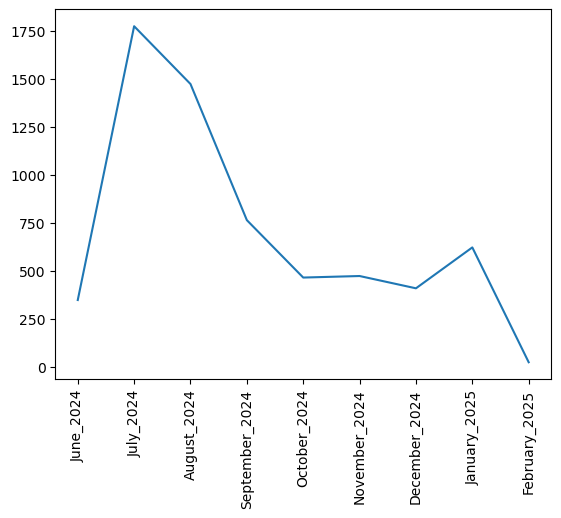

In [133]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [135]:
df

,datetime,sender,message,year,month,day,hour,minute,month_num
0,2024-06-26 21:09:00,Messages and calls are end-to-end encrypted. N...,"23 PM - ~ Sundram created group ""CampusX (unof...",2024,June,26,21,9,6
1,2024-06-26 21:09:00,"Omegale🎃 added you\n6/26/24, 9",15 PM - +91 63058 62135: Most companies don't ...,2024,June,26,21,9,6
2,2024-06-26 21:16:00,+91 90360 12909,"Yeah, that's a problem...a lot of things are e...",2024,June,26,21,16,6
3,2024-06-26 21:16:00,+91 90360 12909,There should be an easy way to handle this DSA,2024,June,26,21,16,6
4,2024-06-26 21:17:00,+91 95605 07334,Doesn’t develoving complex algorithms enough f...,2024,June,26,21,17,6
...,...,...,...,...,...,...,...,...,...
6347,2025-02-02 09:33:00,+91 75594 09854,<Media omitted>,2025,February,2,9,33,2
6348,2025-02-02 14:35:00,+91 83055 24734,mee,2025,February,2,14,35,2
6349,2025-02-02 21:49:00,+91 73511 15354,<Media omitted>,2025,February,2,21,49,2
6350,2025-02-03 11:52:00,+92 321 4229408,Have Nitish sir done any mini project on Linea...,2025,February,3,11,52,2


In [137]:
print(df['datetime'].isna().sum())

0


In [139]:
print(df.dtypes)

datetime     datetime64[ns]
sender               object
message              object
year                  int32
month                object
day                   int32
hour                  int32
minute                int32
month_num             int32
dtype: object


In [177]:
import re
import pandas as pd

def preprocess(data):
    pattern = r"(\d{1,2}/\d{1,2}/\d{2,4}),\s*(\d{1,2}:\d{2}\s*[APap][Mm])\s*-\s*([^:]+):\s*(.*)"
    
    # Replace special characters
    data = data.replace("\u202f", " ")

    # Extract messages with regex
    messages = re.findall(pattern, data)[1:]  # Skipping the first match to avoid an empty string

    # Create DataFrame from messages
    df = pd.DataFrame(messages, columns=["date", "time", "sender", "message"])

    # Convert 'date' column to datetime
    df["date"] = pd.to_datetime(df["date"], format="%m/%d/%y", errors="coerce")

    # Combine 'date' and 'time' into a single 'datetime' column
    df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'], errors='coerce')

    # Check for invalid datetime values and print them
    print(f"Invalid datetime entries: {df['datetime'].isna().sum()}")

    # Drop original 'date' and 'time' columns
    df = df.drop(columns=['date', 'time'])

    # Extract components from datetime
    df['only_date'] = df['datetime'].dt.date
    df['year'] = df['datetime'].dt.year
    df['month_num'] = df['datetime'].dt.month  # Ensure month_num is created
    df['month'] = df['datetime'].dt.month_name()
    df['day'] = df['datetime'].dt.day
    df['day_name'] = df['datetime'].dt.day_name()  # Corrected to use 'datetime'
    df['hour'] = df['datetime'].dt.hour
    df['minute'] = df['datetime'].dt.minute

    # Reorder the columns
    df = df[['datetime', 'sender', 'message', 'year', 'month', 'day', 'hour', 'minute','month_num','day_name']]

    # Create a 'period' column for hour ranges
    period = []

    for hour in df['hour']:
        if hour == 23:
            period.append(str(hour) + "-" + str('00'))
        elif hour == 0:
            period.append(str('00') + "-" + str(hour + 1))
        else:
            period.append(str(hour) + "-" + str(hour + 1))

    df['period'] = period

    return df


In [179]:
df = preprocess(chat_text)
print(df.columns)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13308\3602029875.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'], errors='coerce')


Invalid datetime entries: 0
Index(['datetime', 'sender', 'message', 'year', 'month', 'day', 'hour',
       'minute', 'month_num', 'day_name', 'period'],
      dtype='object')


In [165]:
print(df.head())
print(df['datetime'].isna().sum())

             datetime                          sender  \
0 2024-06-26 21:09:00  Omegale🎃 added you\n6/26/24, 9   
1 2024-06-26 21:16:00                 +91 90360 12909   
2 2024-06-26 21:16:00                 +91 90360 12909   
3 2024-06-26 21:17:00                 +91 95605 07334   
4 2024-06-26 21:21:00                 +91 63058 62135   

                                             message  year month  day  hour  \
0  15 PM - +91 63058 62135: Most companies don't ...  2024  June   26    21   
1  Yeah, that's a problem...a lot of things are e...  2024  June   26    21   
2     There should be an easy way to handle this DSA  2024  June   26    21   
3  Doesn’t develoving complex algorithms enough f...  2024  June   26    21   
4  Yes, the increase in competition did increase ...  2024  June   26    21   

   minute period  
0       9  21-22  
1      16  21-22  
2      16  21-22  
3      17  21-22  
4      21  21-22  
0
